- Importando bibliotecas e carregando os dados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
fraude_df = pd.read_csv('/content/drive/MyDrive/projetos_portfolio/dados_pre_processados.csv')

In [ ]:
fraude_df.head()

,fraude,media_id,tempo,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,pais_Brazil,pais_British Indian Ocean Territory,pais_Brunei Darussalam,pais_Bulgaria,pais_Burkina Faso,pais_Burundi,pais_Cambodia,pais_Cameroon,pais_Canada,pais_Cape Verde,pais_Cayman Islands,pais_Chile,pais_China,...,pais_Saint Kitts and Nevis,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,0,5.263152e-07,4.217734e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.263152e-07,4.357532e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,5.789473e-01,7.887854e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,5.263152e-07,5.403313e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,5.263152e-07,4.960187e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


- Classificando as features pelo nível de importância.

In [ ]:
X = fraude_df.drop('fraude',axis=1)
Y = fraude_df['fraude']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier()

In [ ]:
_ = clf.fit(X,Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importancia'] = clf.feature_importances_

features[ features.importancia > np.mean(features.importancia)].sort_values(by='importancia',ascending=False)

,feature,importancia
1,tempo,0.695555
0,media_id,0.298445


- Separando as amostras de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.25, random_state=42)

- Ajustando os dados de saída.

In [ ]:
Y_treino = Y_treino.apply(lambda x: 1 if x == 0 else -1)
Y_teste = Y_teste.apply(lambda x: 1 if x == 0 else -1)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

In [ ]:
IF = IsolationForest(max_samples='auto', contamination=0.095, random_state=1)
param_grid = {'n_estimators':np.arange(100,550,50)}

clf = GridSearchCV(IF,
                   param_grid,
                   cv=5,
                   n_jobs=10,
                   scoring='f1',
                   verbose=10
                   )

_ = clf.fit(X_treino,Y_treino)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  5.9min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed: 12.9min
[Parallel(n_jobs=10)]: Done  31 out of  45 | elapsed: 22.5min remaining: 10.2min
[Parallel(n_jobs=10)]: Done  36 out of  45 | elapsed: 30.2min remaining:  7.5min
[Parallel(n_jobs=10)]: Done  41 out of  45 | elapsed: 32.6min remaining:  3.2min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed: 33.0min finished


In [ ]:
IF_best = clf.best_estimator_
y_pred = IF_best.predict(X_teste)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [ ]:
roc_auc = roc_auc_score(Y_teste, y_pred) 
print('Área sob a curva ROC: {:0.3f}'.format(roc_auc))

Área sob a curva ROC: 0.730


In [ ]:
print(classification_report(Y_teste,
                            y_pred,
                            target_names=['anomalo','normal']))

              precision    recall  f1-score   support

     anomalo       0.51      0.51      0.51      3563
      normal       0.95      0.95      0.95     34215

    accuracy                           0.91     37778
   macro avg       0.73      0.73      0.73     37778
weighted avg       0.91      0.91      0.91     37778



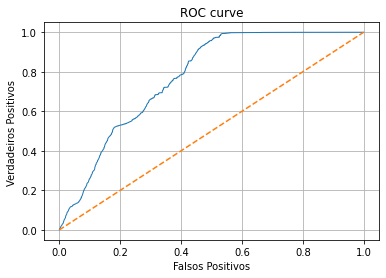

In [ ]:
IF_proba = IF_best.decision_function(X_teste)
fpr, tpr, thresholds = roc_curve(Y_teste, IF_proba)

plt.plot(fpr, tpr, lw=1)

plt.plot([0,1],[0,1], '--', label='Previsão aleatória')

plt.title('ROC curve')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos ')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

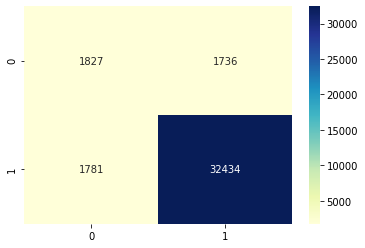

In [ ]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g',cmap="YlGnBu")

# plt.xlabel('Predição( 1 ou 0)')
# plt.ylabel('Real ( 1 ou 0)')